In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Henter ut variabler for nedbør:

In [2]:
%store -r gjennomsnitt_nedbor
%store -r median_nedbor
%store -r standardavvik_nedbor
%store -r df_nedbor_renset_gjennomsnittlige_verdier


# Henter ut variabler for temperatur:

In [3]:
%store -r gjennomsnitt_temp
%store -r median_temp
%store -r standardavvik_temp
%store -r df_temp_renset

# Henter ut variabler for skydekke:

In [4]:
%store -r gjennomsnitt_skydekke
%store -r median_skydekke
%store -r standardavvik_skydekke
%store -r df_skydekke_renset

# Lage felles visualiseringer:

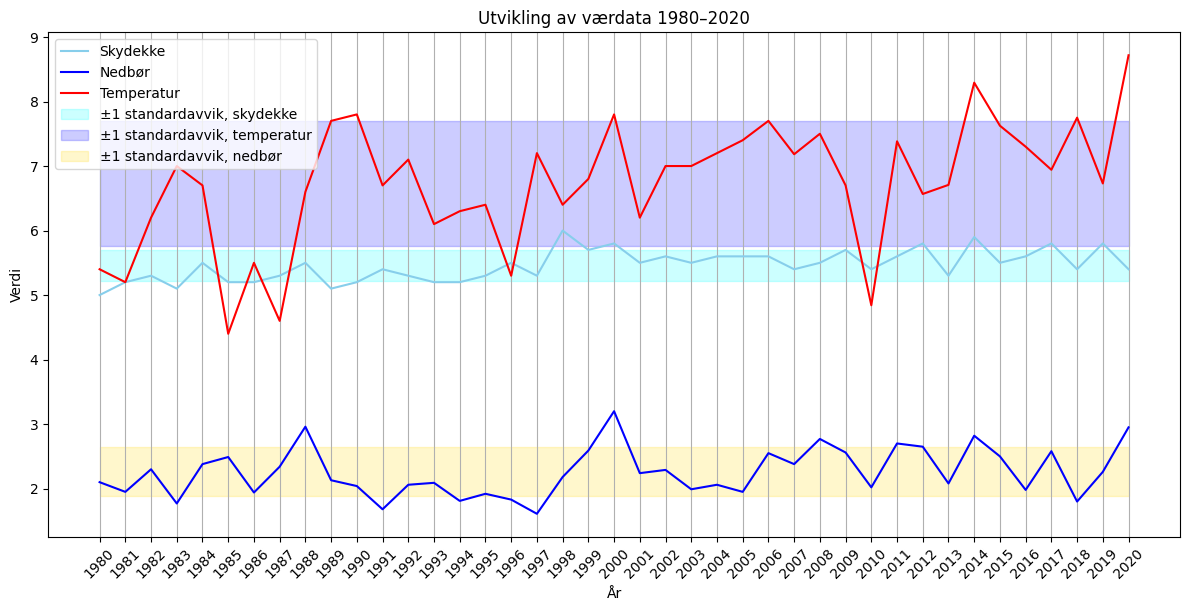

In [5]:
år = df_nedbor_renset_gjennomsnittlige_verdier['year']
verdier_nedbør = df_nedbor_renset_gjennomsnittlige_verdier['value']
verdier_skydekke = df_skydekke_renset['value']
verdier_temp = df_temp_renset['value']


# Setter opp figuren
plt.figure(figsize=(12, 6))

# Plotter hver variabel med en egen farge og label
plt.plot(år, verdier_skydekke, label='Skydekke', color='skyblue')
plt.plot(år, verdier_nedbør, label='Nedbør', color='blue')
plt.plot(år, verdier_temp, label='Temperatur', color='red')

# Legger til tittel og aksetekster
plt.title('Utvikling av værdata 1980–2020')
plt.xlabel('År')
plt.ylabel('Verdi')

#Standardavvik
std_skydekke = plt.fill_between(år, gjennomsnitt_skydekke['Totalt'] - standardavvik_skydekke['Totalt'], gjennomsnitt_skydekke['Totalt'] + standardavvik_skydekke['Totalt'],
                 color='cyan', alpha=0.2, label='±1 standardavvik, skydekke')
std_temp = plt.fill_between(år, gjennomsnitt_temp['Totalt'] - standardavvik_temp['Totalt'], gjennomsnitt_temp['Totalt'] + standardavvik_temp['Totalt'],
                 color='blue', alpha=0.2, label='±1 standardavvik, temperatur')
std_nedbor = plt.fill_between(år, gjennomsnitt_nedbor['Totalt'] - standardavvik_nedbor['Totalt'], gjennomsnitt_nedbor['Totalt'] + standardavvik_nedbor['Totalt'],
                 color='gold', alpha=0.2, label='±1 standardavvik, nedbør')


# Viser legend
plt.legend()

# Viser grafen
plt.tight_layout()
plt.grid(axis='x')
plt.xticks(ticks=år, rotation=45)
plt.show()



# Korrelasjonsmatrise

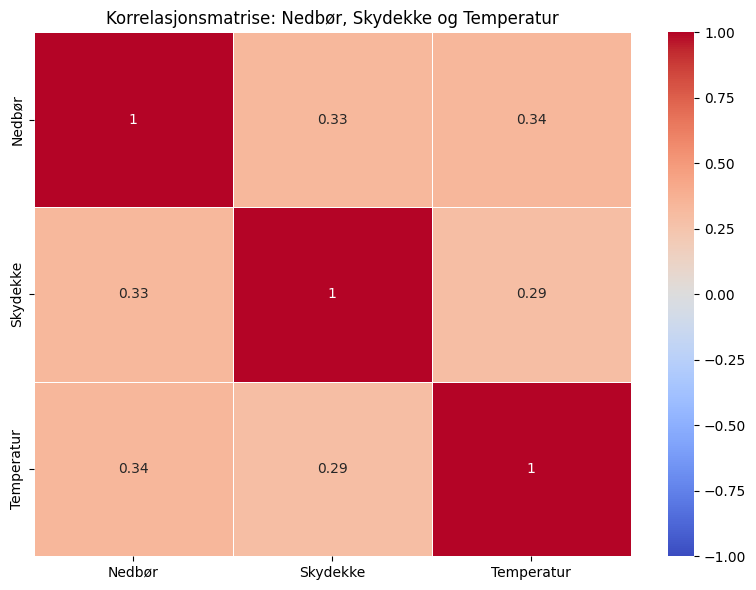

In [6]:
# lager en dataframe for å samle relevante variabler i ett objekt
df_korrelasjon = pd.DataFrame({
    'Nedbør': verdier_nedbør,
    'Skydekke': verdier_skydekke,
    'Temperatur': verdier_temp
})

# Beregner korrelasjonsmatrise for å se sammenhengen mellom datasettene, bruker seaborn .corr
korrelasjonsmatrise = df_korrelasjon.corr()

# Plotter korrelasjonsmatrisen som en heatmap for bedre visualisering
plt.figure(figsize=(8, 6))
sns.heatmap(korrelasjonsmatrise, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Korrelasjonsmatrise: Nedbør, Skydekke og Temperatur')
plt.tight_layout()
plt.show()